In [62]:
import quimb as qu
import quimb.tensor as qtn
import numpy as np
import tnmpa.solvers.quimb_vbp as qbp
import bp_funcs as bpf
import itertools
import random

def contract_HTN_partition(tn):
    import quimb.tensor as qtn
    tensor_list = []
    for tensor in tn.tensor_map.values():
        tensor_list.append(tensor)
    value = qtn.tensor_contract(*tensor_list, output_inds=[])
    return value

tn = qtn.tensor_builder.HTN2D_classical_LennardJones_partition_function(Lx=2.5, Ly=2.5, Nx=5, Ny=5, beta=0.1,cutoff=3.0,cyclic=True)
# tn = qtn.tensor_builder.HTN2D_classical_LennardJones_partition_function(Lx=2, Ly=2, Nx=2, Ny=2, beta=0.1,cutoff=3.0)
# tn.hyperinds_resolve_('dense','clustering')
# for tensor in tn.tensors:
#     if len(tensor.inds) > 2:
#         tensor.add_tag('COPY')
# ntn = qtn.tensor_builder.TN2D_classical_ising_partition_function(Lx=10,Ly=10,beta=0.1)

# tn.draw(show_inds='bond-size')

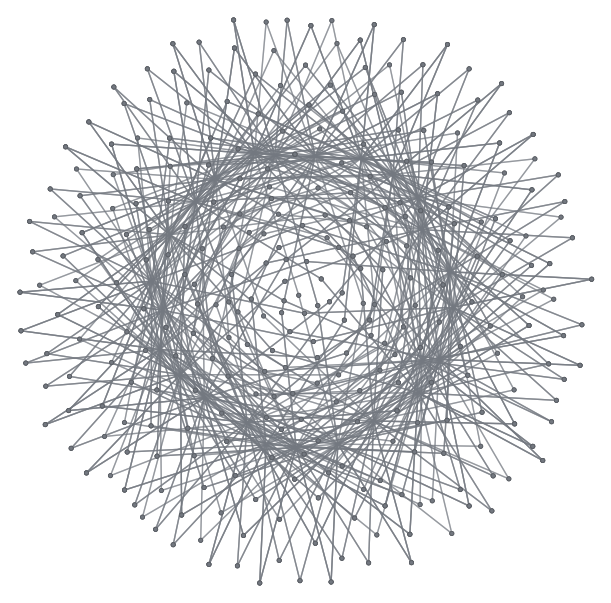

In [63]:
tn.draw()
# tn.draw()
# tn_LJ.draw()

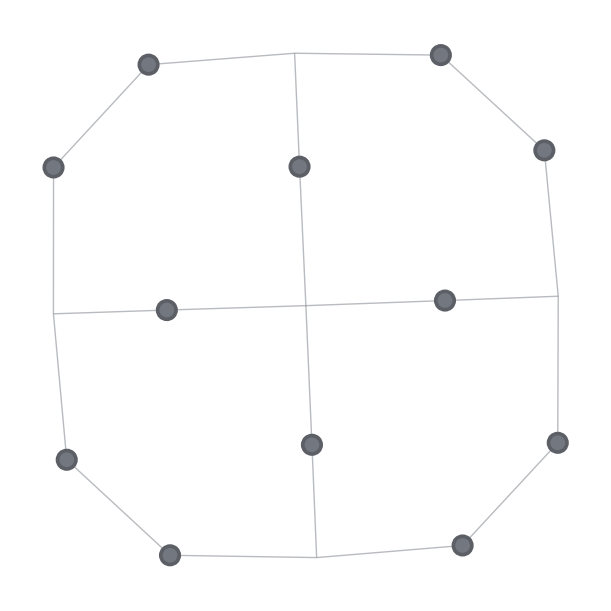

['s1,1', 's0,0']


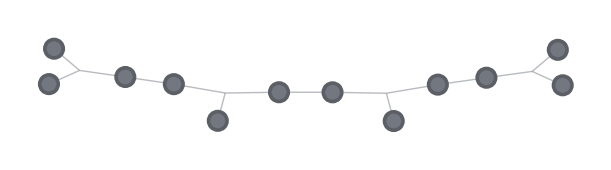

TensorNetwork(tensors=12, indices=7)

In [56]:
N_a = 3
tn = qtn.tensor_builder.HTN2D_classical_ising_partition_function(Lx=3,Ly=3,beta=0.1)
tn.draw()
ind_list = []
ind_id = 's{},{}'
n=2
# for i,j in itertools.product(range(N_a),range(N_a)):
#     ind_list.append(ind_id.format(i,j))
# sampled_inds = random.sample(ind_list,n)
sampled_inds = ['s1,1','s0,0']
print(sampled_inds)
n_bit_string_list = bpf.generate_n_bit_strings(n)
tn_fixed = bpf.fix_inds_quimb(tn, sampled_inds, n_bit_string_list[0])
tn_fixed.draw()
tn_fixed

In [76]:
import bp_funcs
four_site_tn = qtn.tensor_builder.HTN2D_4_site_loop_LJ_partition_function(2,0.1,beta=10, chemical_potential=1)
four_site_tn

TensorNetwork(tensors=8, indices=4)

In [3]:
fixed_tn = bp_funcs.fix_ind_quimb(four_site_tn, 's0,0', 1)
fixed_tn

TensorNetwork(tensors=4, indices=3)

In [77]:
messages, converged = qbp.run_belief_propagation(
    four_site_tn, 
    tol=1e-13,
    max_iterations=1000, 
    progbar=True,
    # you can parallelize but its not super efficient
    thread_pool=8,
)
Z_bp = np.exp(qbp.compute_free_entropy_from_messages(four_site_tn, messages))
Z_exact = contract_HTN_partition(four_site_tn)
marginal = qbp.compute_all_index_marginals_from_messages(four_site_tn, messages)
print(Z_bp, Z_exact)
print(messages)
print(marginal)

max_dm=8.643086246706844e-14:   3%|▎         | 32/1000 [00:00<00:00, 1332.79it/s]

2702678939.2748857 2765617209.209469
{(0, 's0,0'): array([9.99966624e-01, 3.33757992e-05]), (3, 's0,0'): array([0.42369754, 0.57630246]), (4, 's0,0'): array([4.53978687e-05, 9.99954602e-01]), (0, 's0,1'): array([9.99966624e-01, 3.33757992e-05]), (1, 's0,1'): array([0.42369754, 0.57630246]), (5, 's0,1'): array([4.53978687e-05, 9.99954602e-01]), (1, 's1,1'): array([0.42369754, 0.57630246]), (2, 's1,1'): array([9.99966624e-01, 3.33757992e-05]), (6, 's1,1'): array([4.53978687e-05, 9.99954602e-01]), (2, 's1,0'): array([9.99966624e-01, 3.33757992e-05]), (3, 's1,0'): array([0.42369754, 0.57630246]), (7, 's1,0'): array([4.53978687e-05, 9.99954602e-01]), ('s0,0', 0): array([3.33769132e-05, 9.99966623e-01]), ('s0,1', 0): array([3.33769132e-05, 9.99966623e-01]), ('s0,1', 1): array([0.5763106, 0.4236894]), ('s1,1', 1): array([0.5763106, 0.4236894]), ('s1,1', 2): array([3.33769132e-05, 9.99966623e-01]), ('s1,0', 2): array([3.33769132e-05, 9.99966623e-01]), ('s1,0', 3): array([0.5763106, 0.4236894])